In [ ]:
## Improting libraries

import pandas as pd
import numpy as np
import seaborn as sns
import math

In [ ]:
## Loading train dataset

train = pd.read_csv('/content/drive/MyDrive/training.csv')

In [ ]:
## Checking top 5 rows

train.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [ ]:
## Checking shape of the data

train.shape

(250000, 33)

In [ ]:
## Checking null values

train.isnull().sum()

EventId                        0
DER_mass_MMC                   0
DER_mass_transverse_met_lep    0
DER_mass_vis                   0
DER_pt_h                       0
DER_deltaeta_jet_jet           0
DER_mass_jet_jet               0
DER_prodeta_jet_jet            0
DER_deltar_tau_lep             0
DER_pt_tot                     0
DER_sum_pt                     0
DER_pt_ratio_lep_tau           0
DER_met_phi_centrality         0
DER_lep_eta_centrality         0
PRI_tau_pt                     0
PRI_tau_eta                    0
PRI_tau_phi                    0
PRI_lep_pt                     0
PRI_lep_eta                    0
PRI_lep_phi                    0
PRI_met                        0
PRI_met_phi                    0
PRI_met_sumet                  0
PRI_jet_num                    0
PRI_jet_leading_pt             0
PRI_jet_leading_eta            0
PRI_jet_leading_phi            0
PRI_jet_subleading_pt          0
PRI_jet_subleading_eta         0
PRI_jet_subleading_phi         0
PRI_jet_al

In [ ]:
## Importing plotly which is useful for the graphics

%matplotlib inline

import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff


In [ ]:
# ## Imported

# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.metrics import (accuracy_score,
#                             classification_report,
#                             roc_auc_score, roc_curve, auc, precision_recall_curve,
#                             confusion_matrix)

In [ ]:
# # from xgboost import XGBClassifier
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import StratifiedKFold, KFold


In [ ]:
## Libraries useful for EDA

from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')


In [ ]:
## setting display option

pd.set_option('display.max_rows', 250)

In [ ]:
## Importing raw data

raw_data = pd.read_csv("/content/drive/MyDrive/training.csv")
raw_data

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,349995,-999.000,71.989,36.548,5.042,-999.00,-999.000,-999.000,1.392,5.042,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,4.505083,b
249996,349996,-999.000,58.179,68.083,22.439,-999.00,-999.000,-999.000,2.585,22.439,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,2.497259,b
249997,349997,105.457,60.526,75.839,39.757,-999.00,-999.000,-999.000,2.390,22.183,...,1,41.992,1.800,-0.166,-999.000,-999.00,-999.000,41.992,0.018636,s
249998,349998,94.951,19.362,68.812,13.504,-999.00,-999.000,-999.000,3.365,13.504,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,1.681611,b


<Axes: >

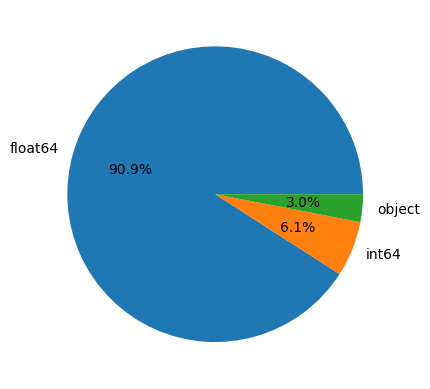

In [ ]:
## Checking distribution of target variable

raw_data.dtypes.value_counts().plot(kind='pie',autopct='%.1f%%')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Function to plot count of target variable in pie chart and bar chart

def plot_count(df: pd.core.frame.DataFrame, col_list: list, title_name: str='Train') -> None:
    """Draws the pie and count plots for categorical variables.

    Args:
        df (pd.core.frame.DataFrame): A pandas dataframe representing the data to be analyzed.
            This could be a training set, test set, etc.
        col_list (list): A list of categorical variable column names from 'df' to be analyzed.
        title_name (str): The title of the graph. Default is 'Train'.

    Returns:
        None. This function produces pie and count plots of the input data and displays them using matplotlib.
    """

    # Creating subplots with 2 columns for pie and count plots for each variable in col_list
    f, ax = plt.subplots(len(col_list), 2, figsize=(10, 4))
    plt.subplots_adjust(wspace=0)

    for col in col_list:

        # Computing value counts for each category in the column
        s1 = df[col].value_counts()
        N = len(s1)

        outer_sizes = s1
        inner_sizes = s1/N

        # Colors for the outer and inner parts of the pie chart
        outer_colors = ['#9E3F00', '#eb5e00', '#ff781f', '#ff9752', '#ff9752']
        inner_colors = ['#ff6905', '#ff8838', '#ffa66b']

        # Creating outer pie chart
        ax[0].pie(
            outer_sizes, colors=outer_colors,
            labels=s1.index.tolist(),
            startangle=90, frame=True, radius=1.3,
            explode=([0.05]*(N-1) + [.3]),
            wedgeprops={ 'linewidth' : 1, 'edgecolor' : 'white'},
            textprops={'fontsize': 12, 'weight': 'bold'},
            shadow=True
        )

        # Text properties for inner pie chart
        textprops = {
            'size':13,
            'weight': 'bold',
            'color':'white'
        }

        # Creating inner pie chart
        ax[0].pie(
            inner_sizes, colors=inner_colors,
            radius=1, startangle=90,
            autopct='%1.f%%', explode=([.1]*(N-1) + [.3]),
            pctdistance=0.8, textprops=textprops,
            shadow=True
        )

        # Creating a white circle at the center
        center_circle = plt.Circle((0,0), .68, color='black',
                                fc='white', linewidth=0)
        ax[0].add_artist(center_circle)

        # Barplot for the count of each category in the column
        sns.barplot(
            x=s1, y=s1.index, ax=ax[1],
            palette='YlOrBr_r', orient='horizontal'
        )

        # Customizing the bar plot
        ax[1].spines['top'].set_visible(False)
        ax[1].spines['right'].set_visible(False)
        ax[1].tick_params(
            axis='x',
            which='both',
            bottom=False,
            labelbottom=False
        )

        # Adding count values at the end of each bar
        for i, v in enumerate(s1):
            ax[1].text(v, i+0.1, str(v), color='black',
                        fontweight='bold', fontsize=12)

        # Adding labels and title
        plt.setp(ax[1].get_yticklabels(), fontweight="bold")
        plt.setp(ax[1].get_xticklabels(), fontweight="bold")
        ax[1].set_xlabel(col, fontweight="bold", color='black')
        ax[1].set_ylabel('count', fontweight="bold", color='black')

    # Setting a global title for all subplots
    f.suptitle(f'{title_name}', fontsize=20, fontweight='bold')

    # Adjusting the spacing between the plots
    plt.tight_layout()
    plt.show()


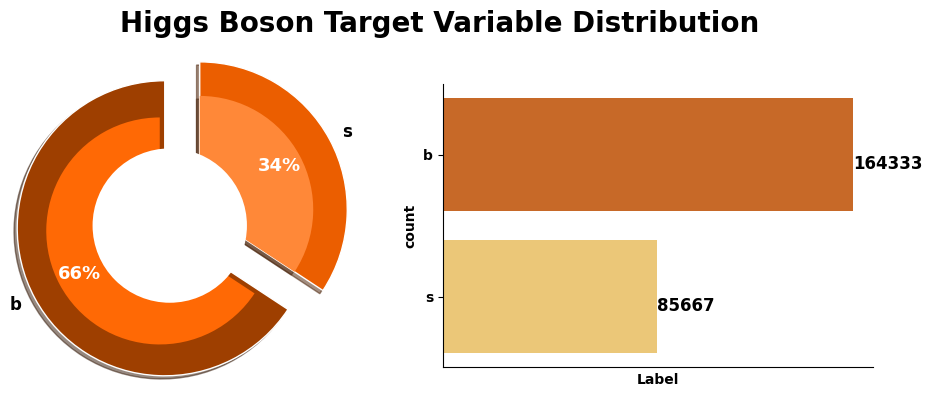

In [ ]:
plot_count(raw_data, ['Label'], 'Higgs Boson Target Variable Distribution')

In [ ]:
## Describe the statistical property of the data

raw_data.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,...,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591,1.646767
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,...,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662,1.875103
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,...,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.001502
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,...,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-0.000000,0.018636
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,...,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500,1.156188
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,...,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750,2.404128
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,...,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.822543


In [ ]:
## Checking how many rows contains -999

count_of_999 = (raw_data==-999.0).sum()

In [ ]:
count_of_999

EventId                             0
DER_mass_MMC                    38114
DER_mass_transverse_met_lep         0
DER_mass_vis                        0
DER_pt_h                            0
DER_deltaeta_jet_jet           177457
DER_mass_jet_jet               177457
DER_prodeta_jet_jet            177457
DER_deltar_tau_lep                  0
DER_pt_tot                          0
DER_sum_pt                          0
DER_pt_ratio_lep_tau                0
DER_met_phi_centrality              0
DER_lep_eta_centrality         177457
PRI_tau_pt                          0
PRI_tau_eta                         0
PRI_tau_phi                         0
PRI_lep_pt                          0
PRI_lep_eta                         0
PRI_lep_phi                         0
PRI_met                             0
PRI_met_phi                         0
PRI_met_sumet                       0
PRI_jet_num                         0
PRI_jet_leading_pt              99913
PRI_jet_leading_eta             99913
PRI_jet_lead

In [ ]:
## If column has more than 50% data as unknown then better to delete

unknown_cols = count_of_999[count_of_999>90000].index

In [ ]:
## Dropping such columns

raw_data.drop(columns=unknown_cols,inplace=True)

In [ ]:
## Checking remaining columns

raw_data.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,...,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,3.064,41.928,197.760,1.582,1.396,...,51.626,2.273,-2.414,16.824,-0.277,258.733,2,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,3.473,2.078,125.157,0.879,1.414,...,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,3.148,9.336,197.814,3.776,1.414,...,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,3.310,0.414,75.968,2.354,-1.285,...,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,3.891,16.405,57.983,1.056,-1.385,...,29.774,0.798,1.569,2.723,-0.871,53.131,0,0.000,6.245333,b


In [ ]:
## Number of unique values for each column

raw_data.nunique()

EventId                        250000
DER_mass_MMC                   108338
DER_mass_transverse_met_lep    101637
DER_mass_vis                   100558
DER_pt_h                       115563
DER_deltar_tau_lep               4692
DER_pt_tot                      59042
DER_sum_pt                     156098
DER_pt_ratio_lep_tau             5931
DER_met_phi_centrality           2829
PRI_tau_pt                      59639
PRI_tau_eta                      4971
PRI_tau_phi                      6285
PRI_lep_pt                      61929
PRI_lep_eta                      4987
PRI_lep_phi                      6285
PRI_met                         87836
PRI_met_phi                      6285
PRI_met_sumet                  179740
PRI_jet_num                         4
PRI_jet_all_pt                 103559
Weight                         104096
Label                               2
dtype: int64

In [ ]:
## Replacing target variables into numeric form

raw_data['Label'].replace({'s':'1','b':'0'},inplace=True)

In [ ]:
## Taking numerical features

features = [col for col in raw_data.columns if col not in ['EventId', 'PRI_jet_num', 'Label']]

In [ ]:
# check numerical variables' distribution

features = features  # we created feature list above.

In [ ]:
## Defined histograms hyper params

n_bins = 50
histplot_hyperparams = {
    'kde':True,
    'alpha':0.4,
    'stat':'percent',
    'bins':n_bins
}

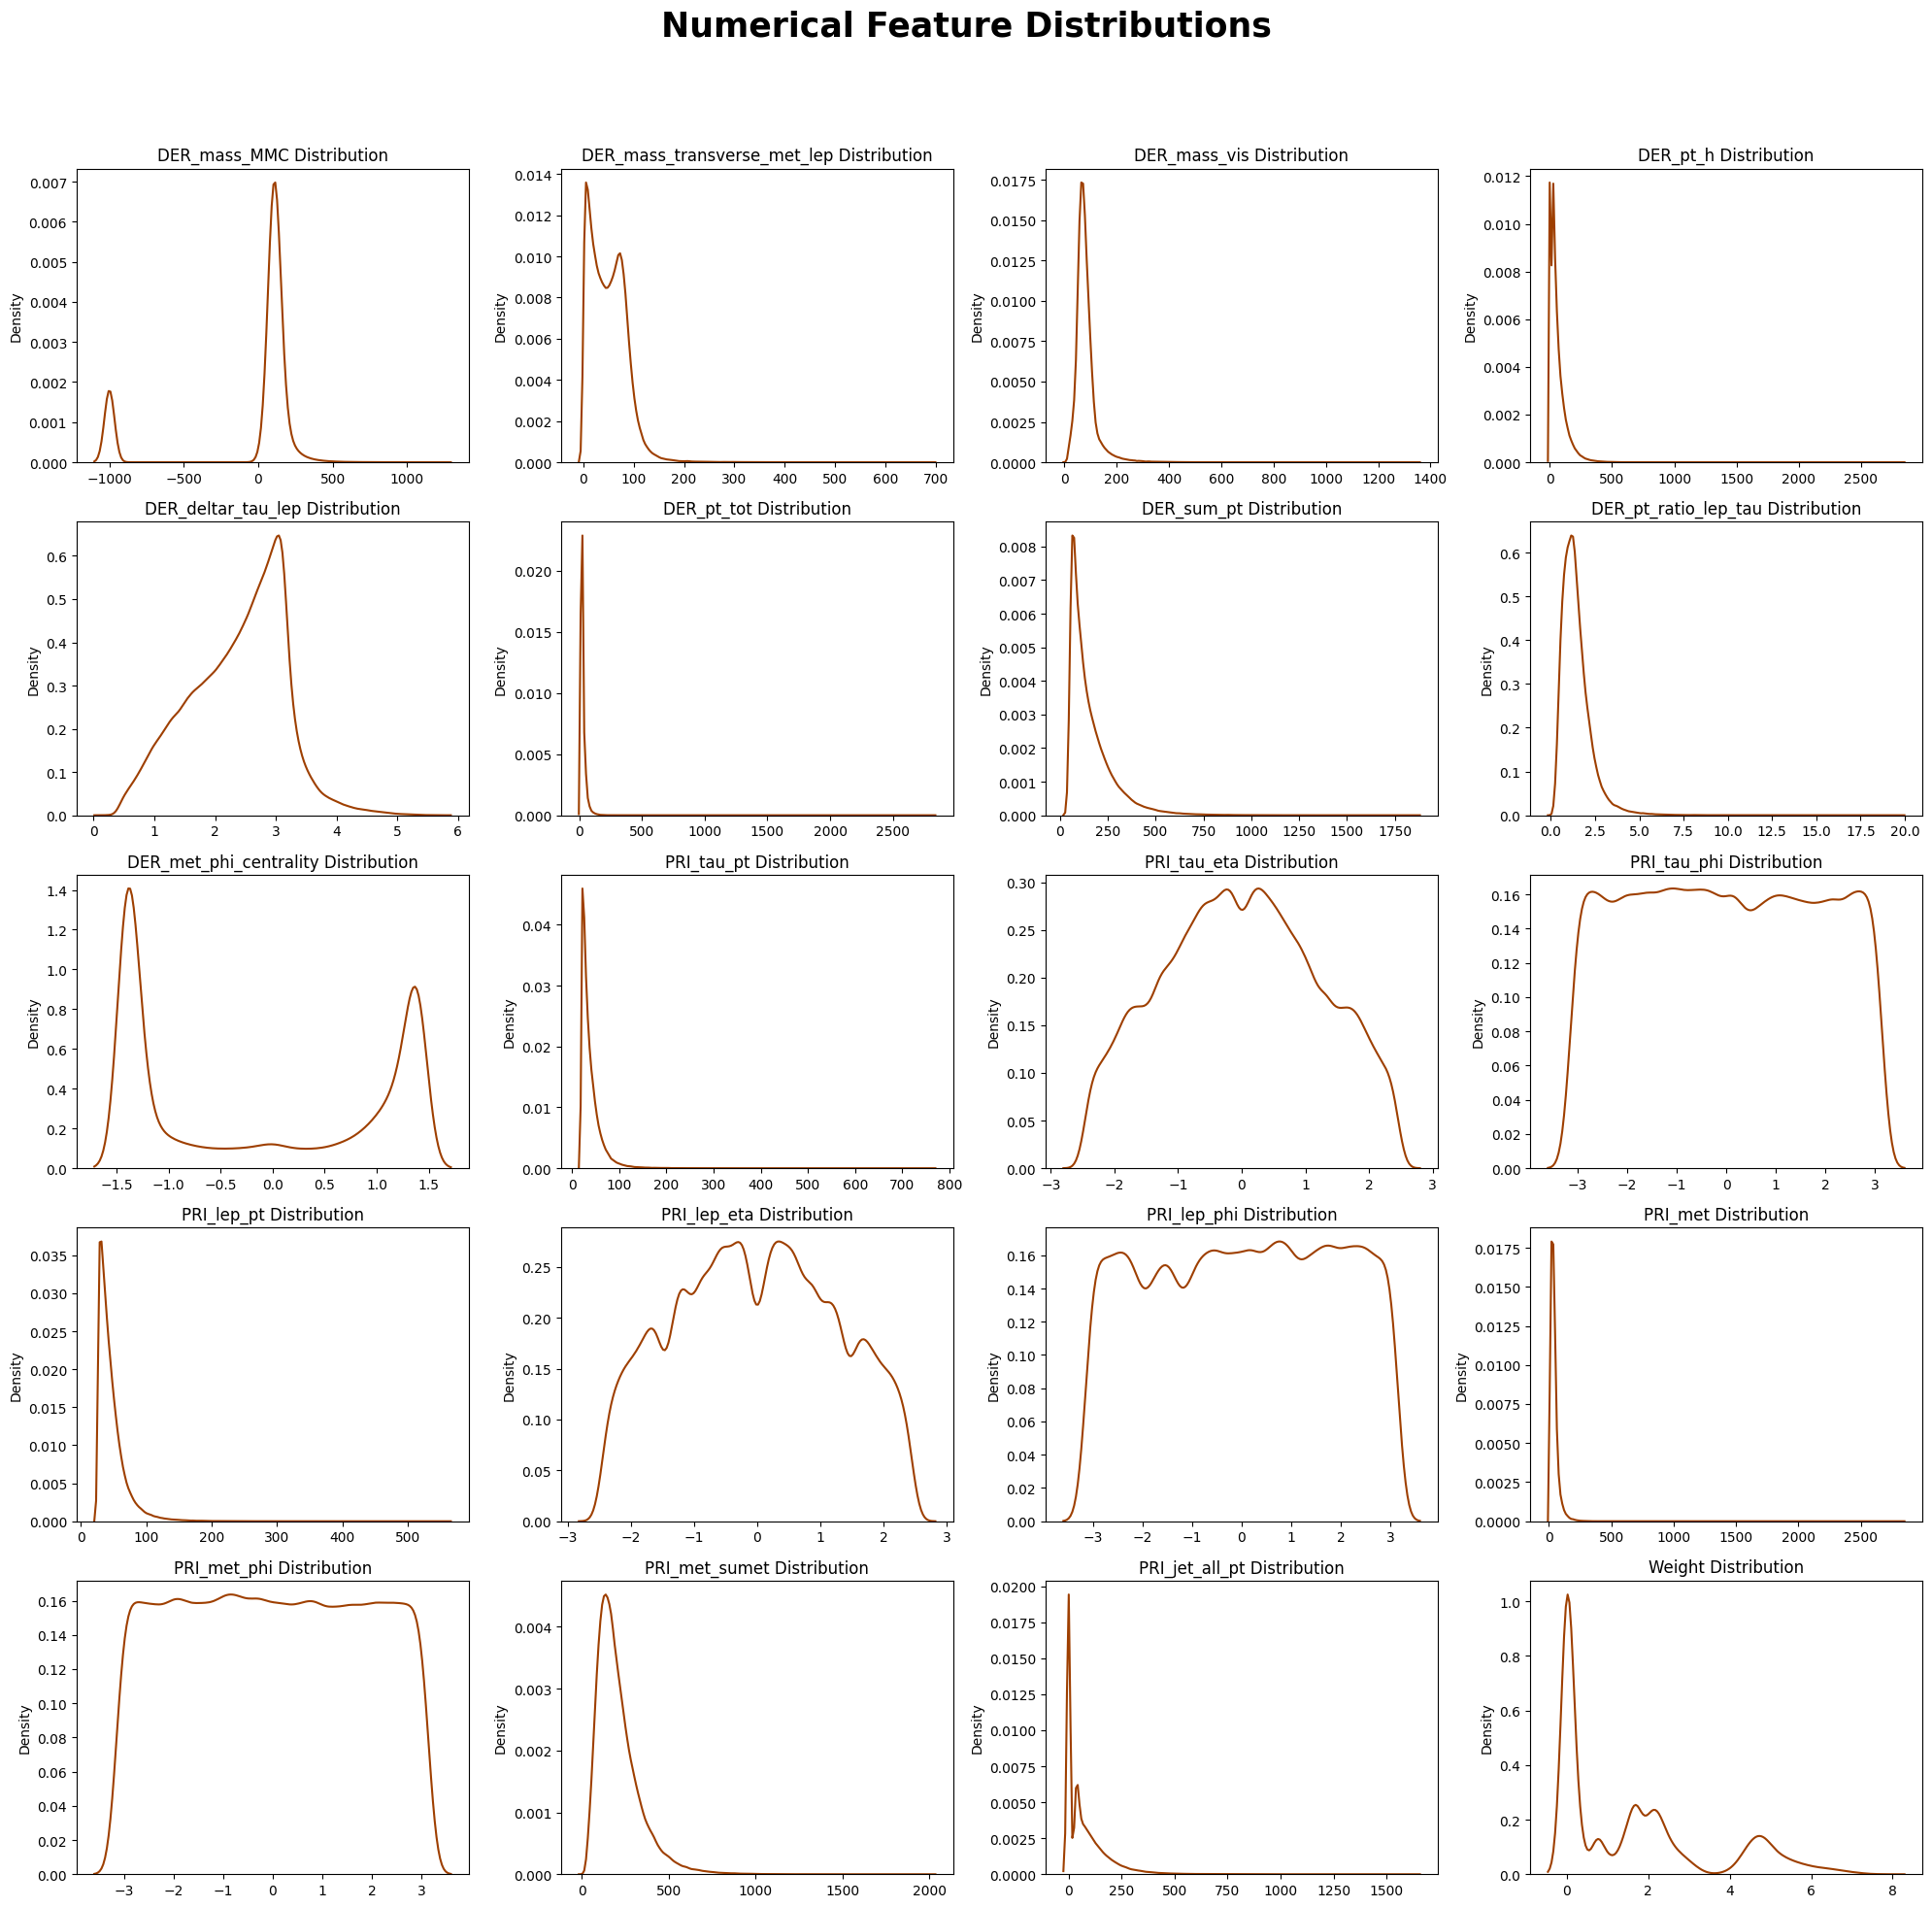

In [ ]:
### Creating 4 by 4 grid to show columns data

columns = features
n_cols = 4
n_rows = math.ceil(len(columns)/n_cols)
fig, ax = plt.subplots(n_rows, n_cols, figsize=(20, n_rows*4))
ax = ax.flatten()

## Now we are showing kdeplot one by one
for i, column in enumerate(columns):
    sns.kdeplot(
        raw_data[column],
        ax=ax[i], color='#9E3F00'
    )

    # titles
    ax[i].set_title(f'{column} Distribution');
    ax[i].set_xlabel(None)

for i in range(i+1, len(ax)):
    ax[i].axis('off')

fig.suptitle(f'Numerical Feature Distributions\n\n\n', ha='center',  fontweight='bold', fontsize=25)
plt.tight_layout()

In [ ]:
## outliers in each column

for i in  features:
  IQR = raw_data[i].quantile(0.75) - raw_data[i].quantile(0.25)
  lower_range = raw_data[i].quantile(0.25) - 1.5 * IQR
  upper_range = raw_data[i].quantile(0.75) + 1.5 * IQR

  outl=[]

  for j in raw_data[i]:
    if j < lower_range:
      outl.append(j)

  for k in raw_data[i]:
    if k > upper_range:
      outl.append(k)

  print(f'The percentage of outliers in {i}:',(len(outl)/len(raw_data)*100),'%')


The percentage of outliers in DER_mass_MMC: 19.7428 %
The percentage of outliers in DER_mass_transverse_met_lep: 0.74 %
The percentage of outliers in DER_mass_vis: 5.8444 %
The percentage of outliers in DER_pt_h: 5.5564 %
The percentage of outliers in DER_deltar_tau_lep: 0.2576 %
The percentage of outliers in DER_pt_tot: 3.4528000000000003 %
The percentage of outliers in DER_sum_pt: 4.9155999999999995 %
The percentage of outliers in DER_pt_ratio_lep_tau: 3.8264 %
The percentage of outliers in DER_met_phi_centrality: 0.0 %
The percentage of outliers in PRI_tau_pt: 5.57 %
The percentage of outliers in PRI_tau_eta: 0.0 %
The percentage of outliers in PRI_tau_phi: 0.0 %
The percentage of outliers in PRI_lep_pt: 5.3736 %
The percentage of outliers in PRI_lep_eta: 0.0 %
The percentage of outliers in PRI_lep_phi: 0.0 %
The percentage of outliers in PRI_met: 5.3196 %
The percentage of outliers in PRI_met_phi: 0.0 %
The percentage of outliers in PRI_met_sumet: 4.1228 %
The percentage of outlier

Most of the columnns are having outliers within 5% hence considering only DER_mass_MMC for log transformation

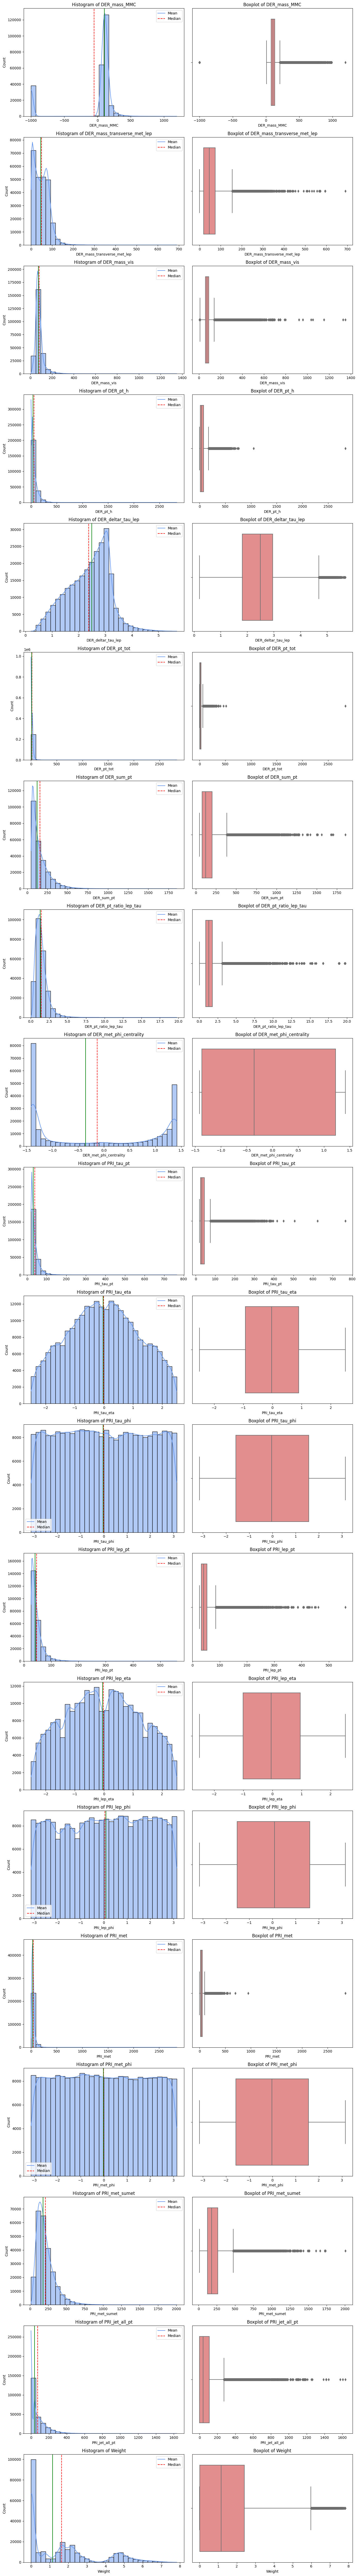

In [ ]:
### Creating histogram and box plots


num_cols_count = len(features)
n_rows = num_cols_count

fig, axs = plt.subplots(n_rows, 2, figsize=(14, n_rows*5))

for idx, col in enumerate(features):

    # Plot histogram
    sns.histplot(data=raw_data, x=col, kde=True, ax=axs[idx, 0], color='cornflowerblue', bins=30)
    axs[idx, 0].set_title(f'Histogram of {col}')
    axs[idx, 0].axvline(raw_data[col].mean(), color='red', linestyle='--')
    axs[idx, 0].axvline(raw_data[col].median(), color='green', linestyle='-')
    axs[idx, 0].legend({'Mean':raw_data[col].mean(), 'Median':raw_data[col].median()})

    # Plot boxplot
    sns.boxplot(data=raw_data, x=col, ax=axs[idx, 1], color='lightcoral')
    axs[idx, 1].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

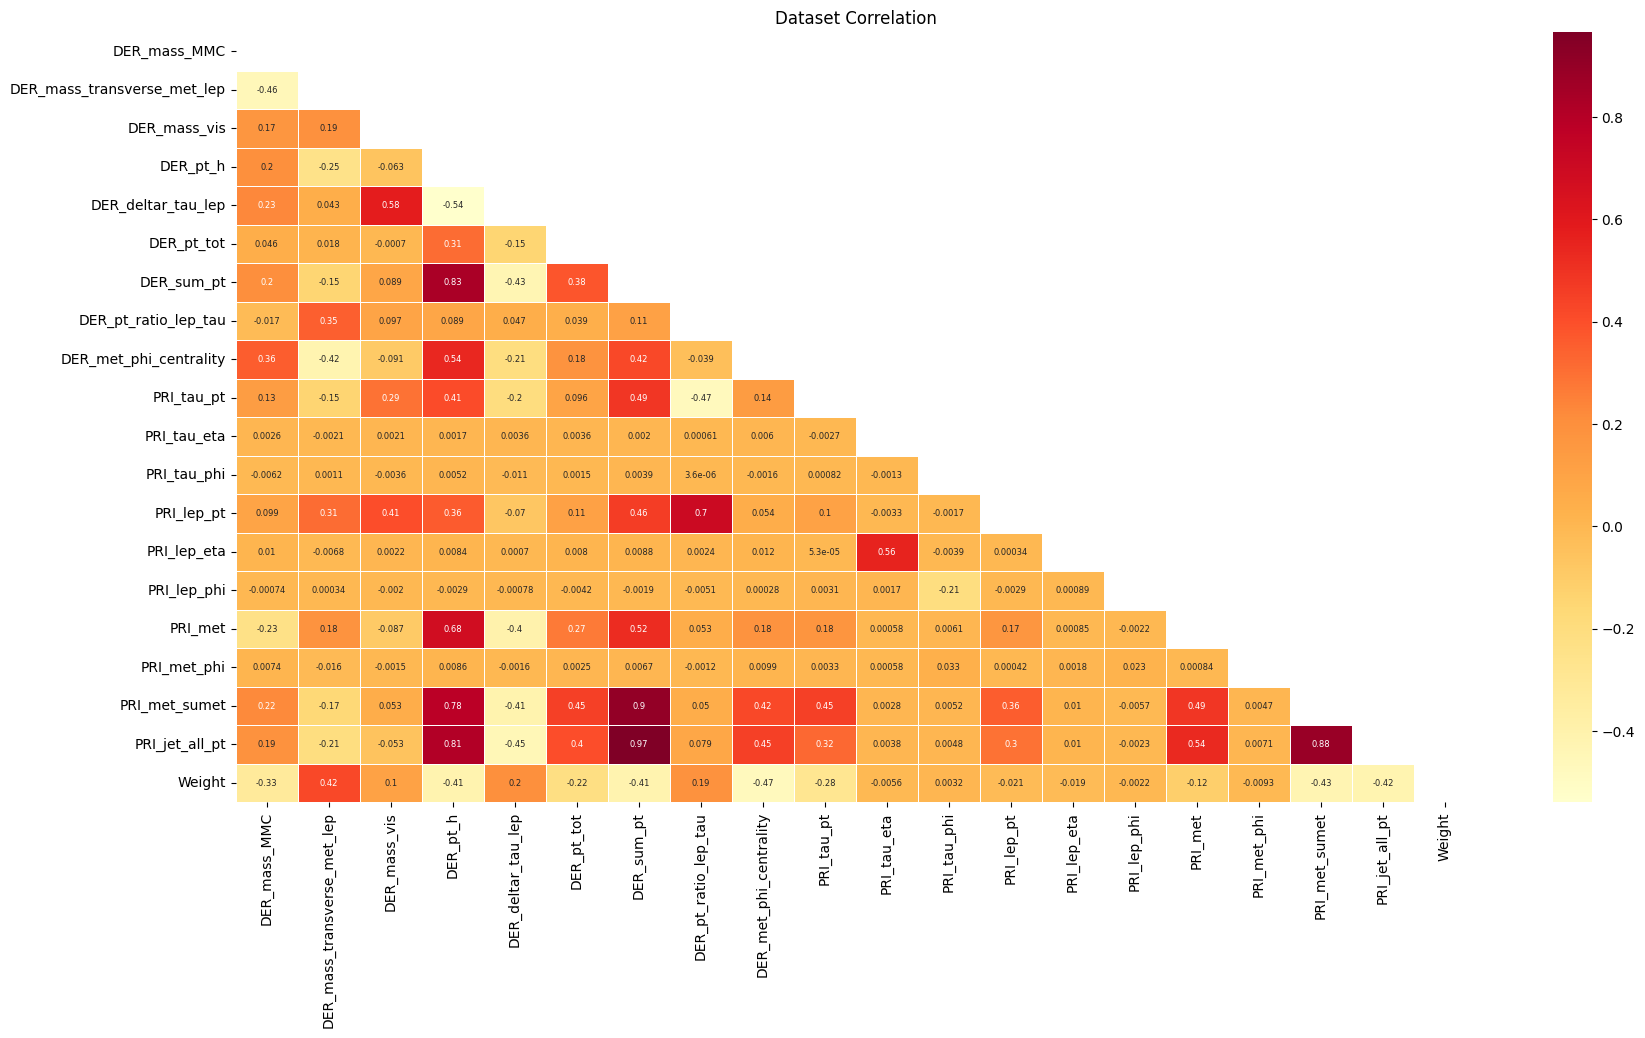

In [ ]:
## Corelation matrix

ef plot_correlation_heatmap(df: pd.core.frame.DataFrame, title_name: str='Dataset correlation') -> None:
    # Remove 'id' and 'log_target' columns
    df = df.drop(columns=['EventId', 'PRI_jet_num', 'Label'])

    corr = df.corr()
    fig, axes = plt.subplots(figsize=(20, 10))
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True

    # Adjust the font size of the annotations using annot_kws
    sns.heatmap(corr, mask=mask, linewidths=.5, cmap='YlOrRd', annot=True, annot_kws={"size": 6})

    plt.title(title_name)
    plt.show()

# Now, you can use this function to visualize the correlation heatmap of your desired dataset.
plot_correlation_heatmap(raw_data, 'Dataset Correlation')

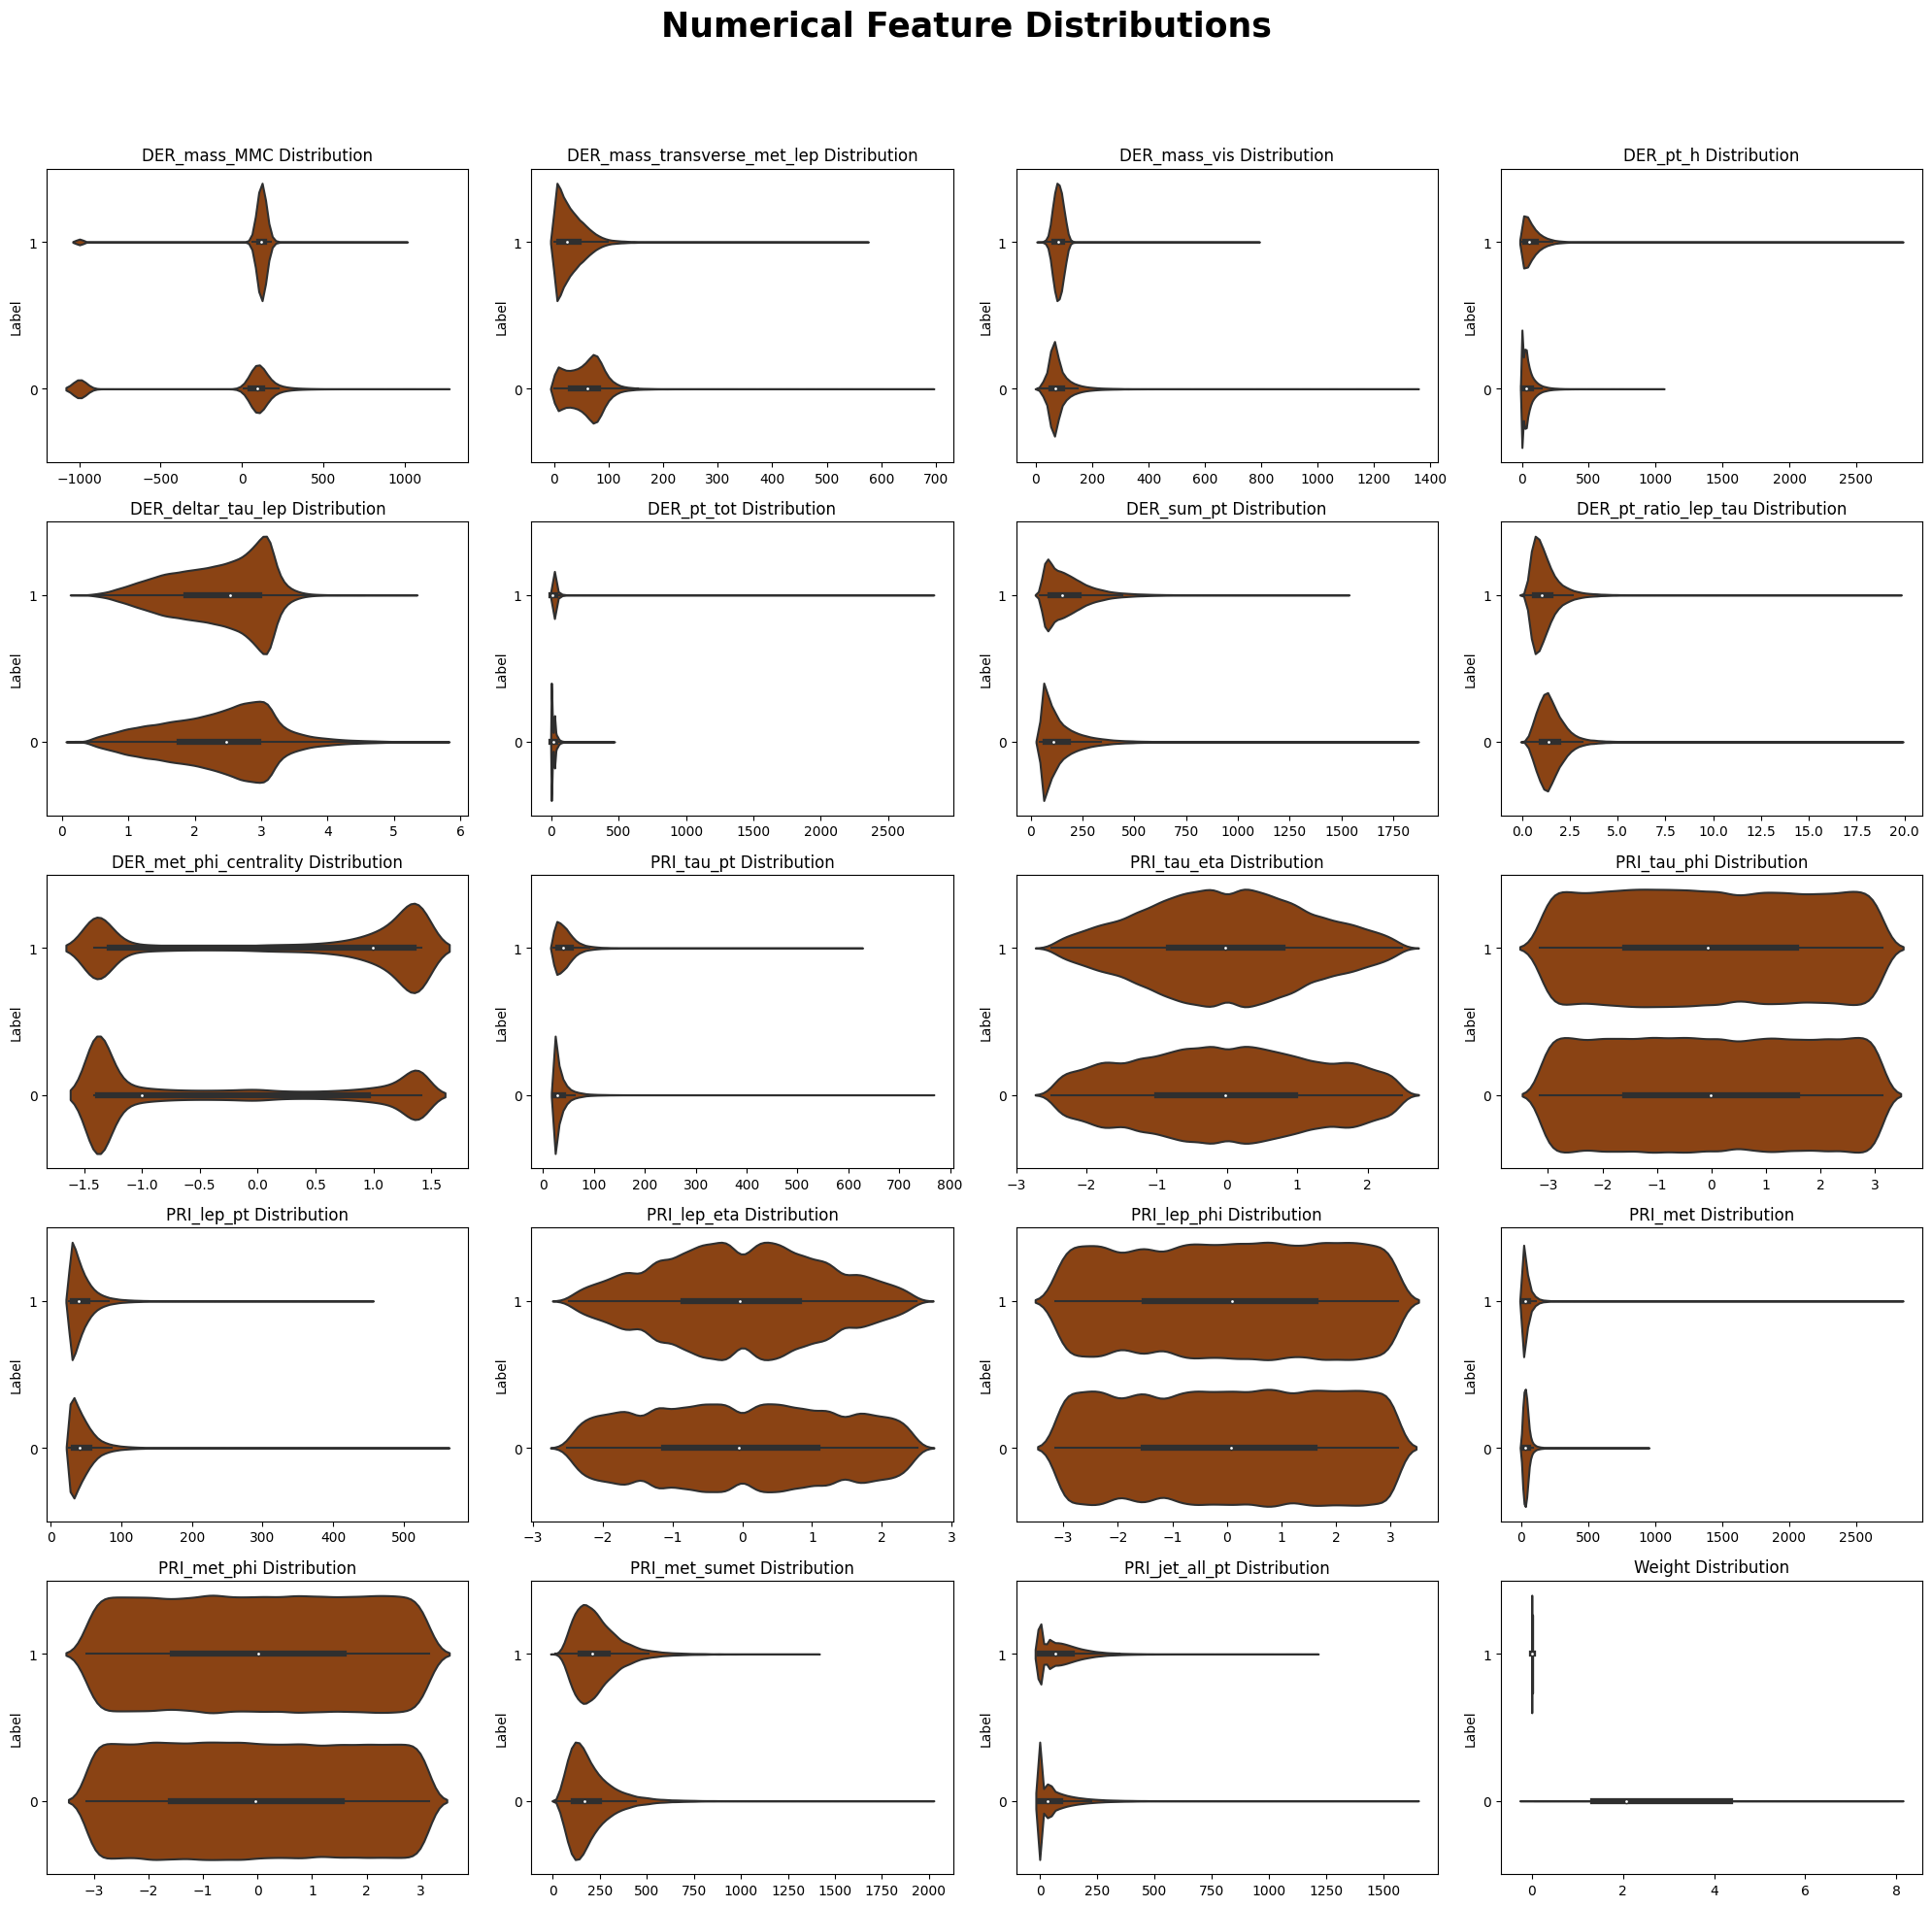

In [ ]:
## Distribution of numerical features using violin plot


columns = features
n_cols = 4
n_rows = math.ceil(len(columns)/n_cols)
fig, ax = plt.subplots(n_rows, n_cols, figsize=(20, n_rows*4))
ax = ax.flatten()

## Now we are showing kdeplot one by one
for i, column in enumerate(columns):
    sns.violinplot(
        x=column, y='Label', data=raw_data,
        ax=ax[i], color='#9E3F00'
    )

    # titles
    ax[i].set_title(f'{column} Distribution');
    ax[i].set_xlabel(None)

for i in range(i+1, len(ax)):
    ax[i].axis('off')

fig.suptitle(f'Numerical Feature Distributions\n\n\n', ha='center',  fontweight='bold', fontsize=25)
plt.tight_layout()

Here, We are seeing high co relation between 3 columns which are
PRI_met_sumet,
PRI_jet_all_pt,
DER_sum_pt

Keeping only DER-sum_pt columns instead

Weight , DER_met_phi_centrality seems to be a good predictor for finding '1'

Apply log transformation to DER_mass_MMC


In [ ]:
raw_data.describe()

NameError: ignored